
# Linear Regression Practice
<div class="alert alert-block alert-info">
This is just a sample I picked from GITHUB to practice a regression model with scikitlearn. 

> Data set has 985 Rows and 12 Columns.

> Goal is to identify variables impacting price of the house in Secremento




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import pandas_profiling
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/linear-regression-video/master/data/sacremento_housing.csv', index_col=0)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [36]:
data.shape

(985, 12)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 100.0+ KB


In [38]:
data.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
801,1440 EMERALD LN,LINCOLN,95648,CA,2,2,0,Residential,Fri May 16 00:00:00 EDT 2008,330000,38.861864,-121.267478
857,4620 BROMWICH CT,ROCKLIN,95677,CA,4,3,0,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.772672,-121.220232
817,506 BEDFORD CT,ROSEVILLE,95661,CA,4,2,2295,Residential,Fri May 16 00:00:00 EDT 2008,360000,38.733985,-121.236766
81,10245 LOS PALOS DR,RANCHO CORDOVA,95670,CA,3,2,1287,Residential,Wed May 21 00:00:00 EDT 2008,234697,38.593699,-121.310890
735,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
445,312 RIVER ISLE WAY,SACRAMENTO,95831,CA,3,2,1375,Residential,Mon May 19 00:00:00 EDT 2008,232000,38.490260,-121.550527
632,1630 GLIDDEN AVE,SACRAMENTO,95822,CA,4,2,1253,Residential,Fri May 16 00:00:00 EDT 2008,125000,38.482717,-121.499683
810,4821 HUTSON WAY,ELK GROVE,95757,CA,5,3,2877,Residential,Fri May 16 00:00:00 EDT 2008,349000,38.386239,-121.448159
815,7709 RIVER VILLAGE DR,SACRAMENTO,95831,CA,3,2,1795,Residential,Fri May 16 00:00:00 EDT 2008,351000,38.483212,-121.540190
102,5615 LUPIN LN,POLLOCK PINES,95726,CA,3,2,1380,Residential,Wed May 21 00:00:00 EDT 2008,265000,38.708315,-120.603872


In [39]:
data.describe(include = 'all')  

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,985,985,985.000000,985,985.000000,985.000000,985.000000,985,985,985.000000,985.000000,985.000000
unique,981,39,NaN,2,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,8306 CURLEW CT,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,439,NaN,984,NaN,NaN,NaN,917,268,NaN,NaN,NaN
mean,NaN,NaN,95750.697462,NaN,2.911675,1.776650,1312.918782,NaN,NaN,233715.951269,38.445121,-121.193371
std,NaN,NaN,85.176072,NaN,1.307932,0.895371,856.123224,NaN,NaN,139088.818896,5.103637,5.100670
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,-984.000000,NaN,NaN,-210944.000000,-121.503471,-121.551704
25%,NaN,NaN,95660.000000,NaN,2.000000,1.000000,950.000000,NaN,NaN,145000.000000,38.482704,-121.446119
50%,NaN,NaN,95762.000000,NaN,3.000000,2.000000,1304.000000,NaN,NaN,213750.000000,38.625932,-121.375799
75%,NaN,NaN,95828.000000,NaN,4.000000,2.000000,1718.000000,NaN,NaN,300000.000000,38.695589,-121.294893


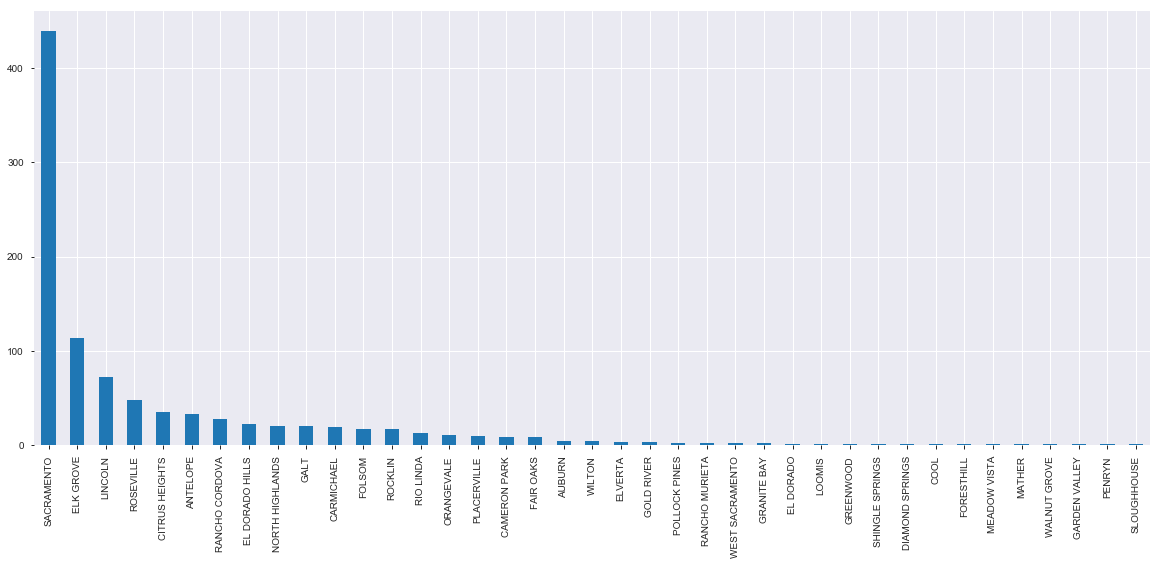

In [40]:
data.city.value_counts().plot(kind='bar',figsize=(20,8))

In [20]:
pandas_profiling.ProfileReport(data)

# Initial Observations
<div class="alert alert-block alert-warning">
    
- Removal of duplicate rows 
- Drop rows with latitude,	longitude, state, street, sale_date, zip,type
- Zeros in data for Bedroom & Bathroom is justified as, there would be houses which will not have bathroom or bedroom (e.g. Condos) at time such houses will be having low price valuation compared to other ones (Quick analysis can justify, if not can be replaced by Mean)
- Square Feet cannot be zero, can be replaced with median value
- Price cannot be negative

**Dropping duplicate rows**

In [41]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

**Dropping few columns which will not impact our analysis**

In [42]:
data = data.drop(['latitude', 'longitude', 'state', 'street', 'sale_date', 'zip','type'], axis=1)

In [43]:
data.rename(columns={'sq__ft':'sqft'}, inplace=True)
 
print(data.columns)

Index(['city', 'beds', 'baths', 'sqft', 'price'], dtype='object')


**Quick check on missing values**

In [44]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
price,0,0.0
sqft,0,0.0
baths,0,0.0
beds,0,0.0
city,0,0.0


In [45]:
data.sample(5)

,city,beds,baths,sqft,price
351,SACRAMENTO,3,1,1082,95000
107,SACRAMENTO,4,3,3009,280987
205,SACRAMENTO,2,1,904,157788
26,SACRAMENTO,3,1,963,127281
316,EL DORADO HILLS,3,2,0,460000


**Removing bath/beds with zero values**

In [46]:
data1 = data[data['city']== 'SACRAMENTO']     #Filter SACRAMENTO

In [47]:
data1 = data1[data1['baths']!= 0]    #Removing zeros in bathroom and bedroom
data1 = data1[data1['beds']!= 0] 

In [48]:
data1.baths.unique()

array([1, 2, 3, 4], dtype=int64)

In [49]:
data1.beds.unique()

array([2, 3, 1, 4, 8, 5, 6], dtype=int64)

In [50]:
data1['sqft']=data1['sqft'].replace(0,data1['sqft'].median())

In [51]:
data1 = data1[data1['price']>= 0]  

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 981
Data columns (total 5 columns):
city     422 non-null object
beds     422 non-null int64
baths    422 non-null int64
sqft     422 non-null int64
price    422 non-null int64
dtypes: int64(4), object(1)
memory usage: 19.8+ KB


In [53]:
data1.sample(10)

,city,beds,baths,sqft,price
15,SACRAMENTO,2,2,1134,110700
710,SACRAMENTO,4,2,1566,220000
367,SACRAMENTO,2,1,804,120000
122,SACRAMENTO,4,3,1914,328360
497,SACRAMENTO,3,2,1410,316630
28,SACRAMENTO,4,2,1380,131200
46,SACRAMENTO,4,2,1580,165000
38,SACRAMENTO,4,2,1146,149593
411,SACRAMENTO,3,2,1436,180000
734,SACRAMENTO,4,2,1876,243500


In [55]:
data_s = data1[['price','sqft','beds','baths']]

In [56]:
pandas_profiling.ProfileReport(data_s)

# Hurraayyy!! data is clean now ready for EDA & Regression

In [57]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 981
Data columns (total 4 columns):
price    422 non-null int64
sqft     422 non-null int64
beds     422 non-null int64
baths    422 non-null int64
dtypes: int64(4)
memory usage: 16.5 KB


In [58]:
data_s.sample()

,price,sqft,beds,baths
0,59222,836,2,1


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

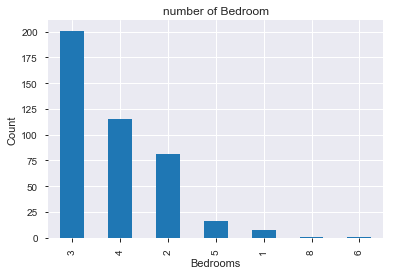

In [59]:
data_s['beds'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

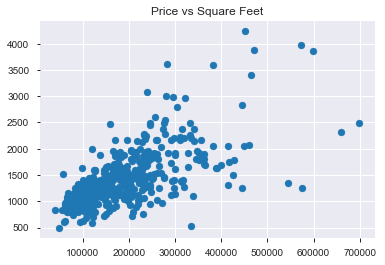

In [60]:
plt.scatter(data_s.price,data_s.sqft)
plt.title("Price vs Square Feet")

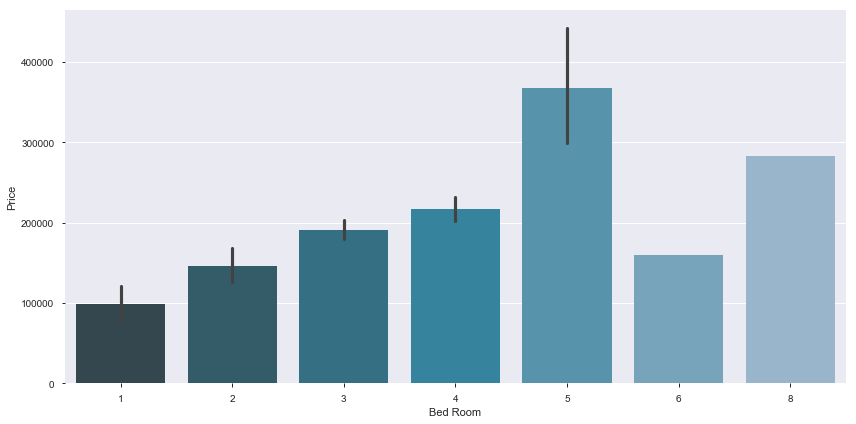

In [61]:
sns.catplot("beds", "price", data=data_s, kind="bar" ,palette="PuBuGn_d",height=6, aspect=2)
plt.xlabel('Bed Room')
plt.ylabel('Price')
plt.show()

**Something fishy with 6 & 8 bed rooms cant be so cheap, lets filter out as counts are negligible**

In [62]:
data_s = data_s[data_s['beds']!= 6]   
data_s = data_s[data_s['beds']!= 8]   

In [63]:
data_s.beds.unique()

array([2, 3, 1, 4, 5], dtype=int64)

In [64]:
data_r = data_s.copy(deep=True)           #ready for regression          

In [66]:
data_r.sample(5)

,price,sqft,beds,baths
667,179000,1695,4,2
728,239000,1686,3,2
186,135000,1211,3,2
793,315000,1360,3,2
851,545000,1348,3,1


# Regression

In [67]:
data_r.describe()

,price,sqft,beds,baths
count,420.000000,420.000000,420.000000,420.000000
mean,194696.666667,1438.511905,3.123810,1.816667
std,100606.727717,538.652763,0.819747,0.642347
min,40000.000000,484.000000,1.000000,1.000000
25%,123731.250000,1092.000000,3.000000,1.000000
50%,173653.000000,1333.000000,3.000000,2.000000
75%,236358.750000,1673.000000,4.000000,2.000000
max,699000.000000,4246.000000,5.000000,4.000000


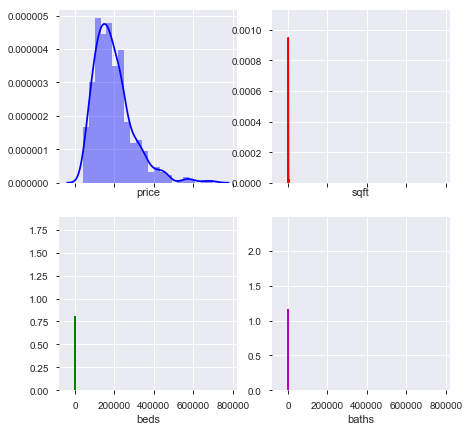

In [68]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data_r.price, color="b", ax=axes[0, 0])

sns.distplot(data_r.sqft, color="r", ax=axes[0, 1])

sns.distplot(data_r.beds, color="g", ax=axes[1, 0])

sns.distplot(data_r.baths, color="m", ax=axes[1, 1])

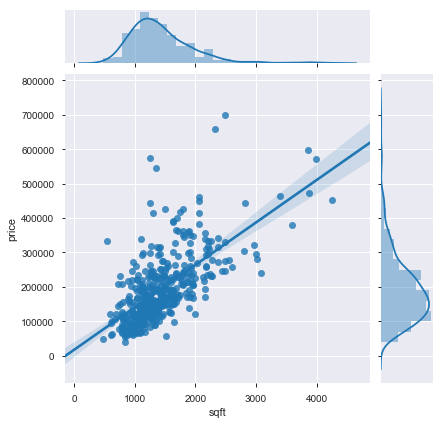

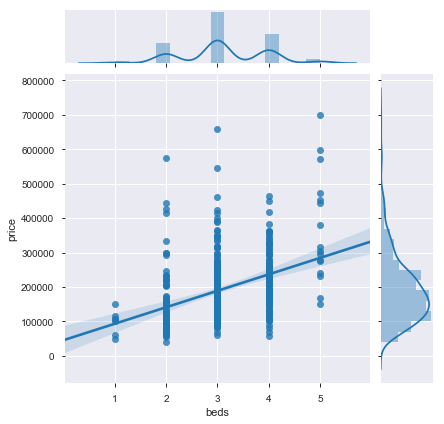

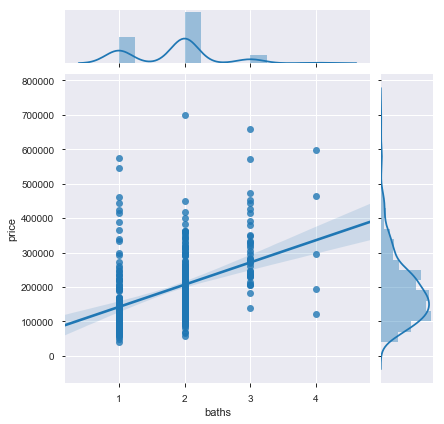

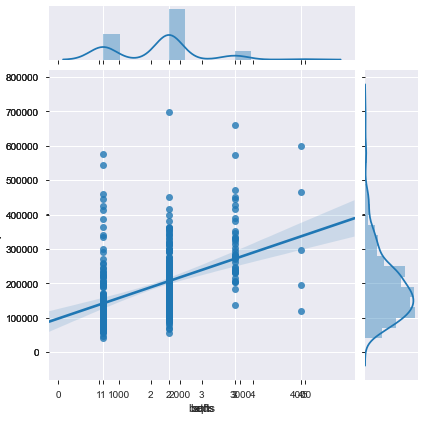

In [69]:
JG1 = sns.jointplot("sqft", "price", data=data_r, kind='reg')
JG2 = sns.jointplot("beds", "price", data=data_r, kind='reg')
JG3 = sns.jointplot("baths", "price", data=data_r, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

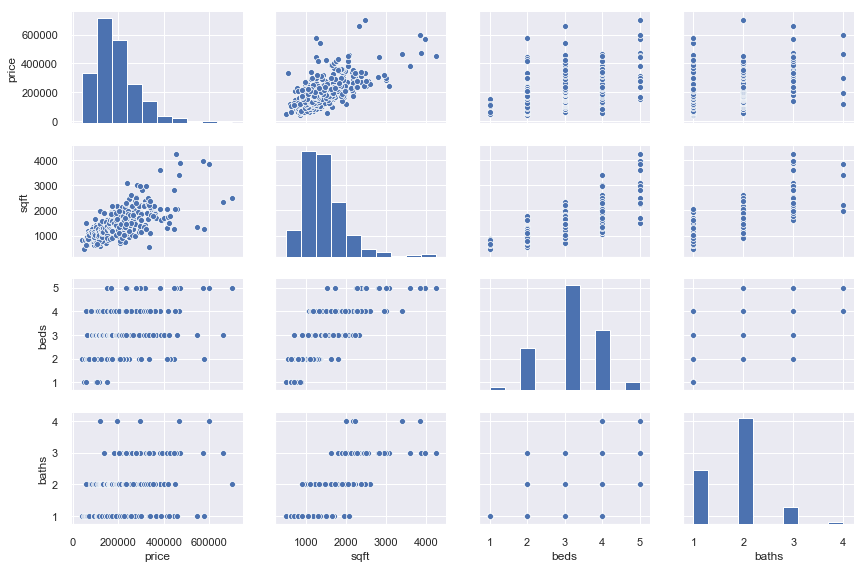

In [53]:
sns.pairplot(data_r, size = 2, aspect = 1.5)

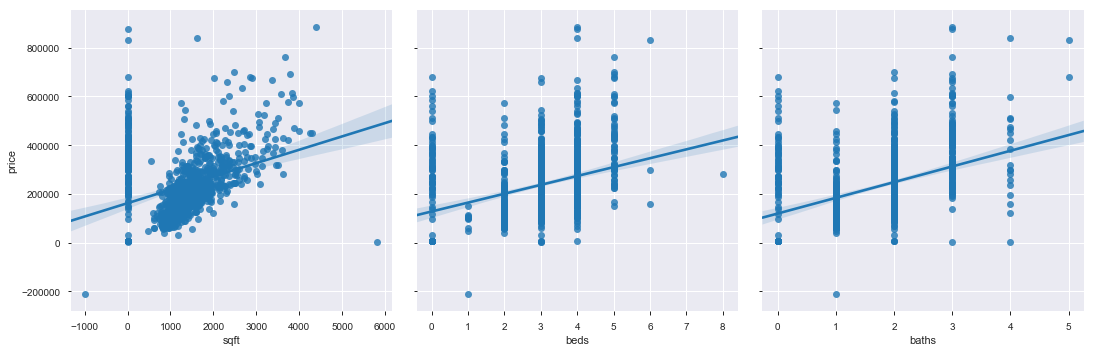

In [70]:
sns.pairplot(data, x_vars=['sqft', 'beds', 'baths'], y_vars='price', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between sqft & price
- Weak relationship between beds and baths

In [71]:
data_s.corr()

,price,sqft,beds,baths
price,1.000000,0.660334,0.389938,0.413442
sqft,0.660334,1.000000,0.722188,0.726033
beds,0.389938,0.722188,1.000000,0.632433
baths,0.413442,0.726033,0.632433,1.000000


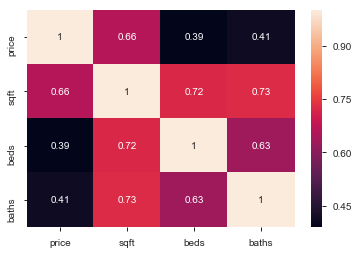

In [72]:
sns.heatmap( data_s.corr(), annot=True );

__No Observations from correlation__

## Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

![image.png](attachment:image.png)

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

### Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

### Assumptions of Linear Regression
1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

 **Preparing X and y using pandas**

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_s)
dataR = scaler.transform(data_s)

In [143]:
dataR = pd.DataFrame(dataR)
dataR.head()

,0,1,2,3
0,-1.348183,-1.119887,-1.372557,-1.272896
1,-1.258718,-0.504659,-0.151214,-1.272896
2,-1.252071,-1.194235,-1.372557,-1.272896
3,-1.247821,-1.090148,-1.372557,-1.272896
4,-1.122501,-1.192377,-1.372557,-1.272896


In [144]:
dataR.columns = ['price','sqft','bed','bath']
dataR.head()

,price,sqft,bed,bath
0,-1.348183,-1.119887,-1.372557,-1.272896
1,-1.258718,-0.504659,-0.151214,-1.272896
2,-1.252071,-1.194235,-1.372557,-1.272896
3,-1.247821,-1.090148,-1.372557,-1.272896
4,-1.122501,-1.192377,-1.372557,-1.272896


In [145]:
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 4 columns):
price    420 non-null float64
sqft     420 non-null float64
bed      420 non-null float64
bath     420 non-null float64
dtypes: float64(4)
memory usage: 13.2 KB


In [146]:
feature_cols = ['sqft', 'bed', 'bath']                # create a Python list of feature names
X = dataR[feature_cols]  

In [147]:
# Splitting the dataset into training and test sets.
data_train, data_test = train_test_split(dataR, test_size = 0.2, random_state = 0)

In [164]:
# Dropping price from x_train and x_test matrices, and creating y_train and y_test vectors for price values.
x_train = data_train.drop(['price'], 1)
y_train = data_train['price']
x_test = data_test.drop(['price'], 1)
y_test = data_test['price']

In [149]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [150]:
# Checking the shapes of training and test sets.
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (336, 3)
Shape of y_train:  (336,)
Shape of x_test:  (84, 3)
Shape of y_test:  (84,)


In [151]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
y_pred_train = linreg.predict(x_train)

In [153]:
y_pred_train[:10]

array([-0.35182056, -0.271211  , -0.26623296, -0.25035678, -0.26656045,
        0.26515265, -0.00425187,  0.7572628 ,  0.192294  , -0.26778315])

In [154]:
y_pred_test = linreg.predict(x_test)

In [155]:
y_pred_test[:10]

array([ 0.60877262,  1.4238419 , -0.06315886, -0.04488414,  0.51853447,
        0.03332689, -0.29211208, -0.1561699 ,  0.04845438,  0.01937523])

## Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [166]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (336, 3)
y_train shape:  (336,)

Test cases as below
X_test shape:  (84, 3)
y_test shape:  (84,)


In [157]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):        
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
    y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

    RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
    print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

### Linear Regression Model without GridSearcCV
Note:  Linear Regression Model with GridSearcCV is implemented at Table of Contents: 8

In [158]:
X = dataR[feature_cols]  
y = dataR.price
linreg = linear_reg(X,y)

RMSE for the test set is 0.7538751875227248


### Interpreting Model Coefficients

In [159]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 0.013920565993516286
Coefficients: [ 0.91936861 -0.22929012 -0.07377444]


In [160]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)   

In [161]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.013920565993516286
sqft 0.9193686108970157
bed -0.22929012207137034
bath -0.07377444338588819


__Y = 0.01392 + (0.9193686 `*` SquareFoot) + (-0.22929 `*` Bedrooms) + (-0.073774 `*` Bathrooms)__

**We interpret the SquareFoot coefficient (0.9193686)**

**Price of the house is dependant on size of the house**

## Using the Model for Prediction

In [167]:
y_pred_train = linreg.predict(X_train)  
y_pred_train

array([-3.08002885e-01,  7.89779865e-01, -4.12241408e-01,  1.27749873e+00,
       -6.71777387e-01,  7.97523911e-01, -6.77109786e-01, -5.72665349e-01,
        6.95630791e-02, -1.41695049e-02, -8.01854248e-01, -5.09935610e-01,
       -5.16770923e-01, -2.43358404e-01, -3.09505800e-01,  1.41127951e-01,
       -4.00570602e-01, -3.76647007e-01, -6.05835905e-01, -6.37255240e-02,
       -1.95305299e-01, -1.30284748e-01, -2.12805409e-01, -7.11492265e-01,
        8.40959634e-01, -5.44112175e-01,  1.53402888e+00,  2.21733870e-01,
        3.37352208e-01, -1.19825865e-01, -3.35429215e-01, -2.12393581e-01,
       -3.74647187e-01, -9.98168311e-02, -5.38694698e-01,  2.69495984e-01,
       -2.12107319e-02,  2.06063425e-01,  2.71286350e-03, -6.00006601e-01,
       -3.82990144e-02,  3.88908047e-01,  4.91934647e-01, -3.32011558e-01,
        5.05600543e-02, -3.68102865e-01, -3.61267553e-01, -2.53405459e-01,
       -6.68565645e-01,  2.34616599e-01,  5.13858423e-01, -4.70135655e-01,
        2.32188024e-02, -

In [168]:
y_pred_test = linreg.predict(X_test)                                                           # make predictions on the testing set
y_pred_test

array([-5.69744598e-01,  4.68435077e-01, -6.70068559e-01,  6.33643404e-03,
       -6.73692130e-01, -4.90847508e-01, -1.45813330e-02, -4.01988439e-01,
       -3.49099841e-01, -3.98364868e-01,  1.30654881e+00,  4.14995393e+00,
       -4.19161799e-01, -5.89753632e-01, -1.95019037e-02,  3.07090205e-01,
        1.07948057e+00, -3.46754438e-02,  3.04434206e+00, -5.16770923e-01,
        8.07279975e-01, -3.31720567e-01,  8.91012559e-01, -1.07518484e-02,
       -5.69744598e-01, -2.16223066e-01, -6.77109786e-01, -5.40197613e-01,
        4.35046409e-01,  1.53182315e+00, -2.63372167e-02, -2.77534969e-01,
       -4.75759045e-01, -7.64345104e-01, -7.31877367e-01,  1.26211928e+00,
        9.49895887e-02, -1.06652144e-01,  4.85099334e-01, -6.64942074e-01,
       -9.63991747e-02, -3.09505800e-01, -5.90165460e-01, -1.20528684e-01,
       -5.21400502e-01,  1.74079710e+00, -4.41291489e-01,  5.36073190e-01,
        6.26435173e-01, -3.80064663e-01, -5.44112175e-01,  4.03996509e-01,
       -2.98040907e-01,  

- We need an evaluation metric in order to compare our predictions with the actual values.

## Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### Model Evaluation using metrics

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Pirce predictions

In [171]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [172]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.5165288986941677
MAE for test set is 0.6142291461776249


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Price predictions

In [175]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [176]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.4959311827614586
MSE for test set is 0.7538751875227248


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Price predictions

In [178]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [179]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.7042238158152979
RMSE for test set is 0.8682598617480396


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

## Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [180]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.4850251612547797 0.4803717741576843


In [181]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.3432041757375778 0.318574332327737


## Feature Selection


At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"Bath or Beds"__ improve the quality of our predictions or not.<br/> 
Lets do some trial and error on features and see if the error (RMSE) is reducing or not.
- Also Applying __Gridsearch__ method for exhaustive search over specified parameter values of  estimator.

In [185]:
feature_cols = ['sqft','bath']                                                          # create a Python list of feature names
X = dataR[feature_cols]  
y = dataR.price
linreg=linear_reg(X,y, gridsearch=True)

Mean cross-validated score of the best_estimator :  0.3921027001378963
RMSE for the test set is 0.701990672095618


In [186]:
feature_cols = ['sqft','bed']                                                          # create a Python list of feature names
X = dataR[feature_cols]  
y = dataR.price
linreg=linear_reg(X,y, gridsearch=True)

Mean cross-validated score of the best_estimator :  0.4293245974520224
RMSE for the test set is 0.765218749043633


### With feature selection Bathroom has better RMSE with squarefoot

# THE END

<div class="alert alert-block alert-warning">
**Feedback if any please email omsarmalkar@gmail.com